#### Redes Neurais

#### Passo 1: Instalar bibliotecas

In [ ]:
#!pip install pandas
#!pip install keras
#!pip install matplotlib
#!pip install scikit-learn

#### Passo 2: Importar bibliotecas

In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

#### Passo 3: Carregar base de dados

In [2]:
data = load_diabetes()

In [3]:
# np.c_ é uma função numpy para concatenar array
df = pd.DataFrame(data= np.c_[data['data'], data['target']],columns= data['feature_names'] + ['target'])
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [5]:
X = pd.DataFrame(data= np.c_[data['data']], columns= data['feature_names'])
y = pd.DataFrame(data= np.c_[data['target']],columns= ['target'])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
print(f"Tamanho de X_train: {X_train.shape}")
print(f"Tamanho de X_test: {X_test.shape}")
print(f"Tamanho de y_train: {y_train.shape}")
print(f"Tamanho de y_test: {y_test.shape}")

Tamanho de X_train: (353, 10)
Tamanho de X_test: (89, 10)
Tamanho de y_train: (353, 1)
Tamanho de y_test: (89, 1)


### ver site
https://didatica.tech/introducao-a-redes-neurais-e-deep-learning/

#### Passo 4: Criar a arquitetura da rede neural

In [28]:
# A função Sequential serve para criar uma camada após a outra de forma sequencial
modelo = Sequential()
# Em seguida para criar cada camada usa-se .add(dados da nova camada)

# units = quantidade de neurônios
# activation = função de ativação https://keras.io/api/layers/activations/       
# input_dim = Dimensão do conjunto de dados de entrada

# 1º Camada
modelo.add(Dense(units=5, activation="relu", input_dim=X_train.shape[1]))

# 2º Camada (neurônio de saída)
modelo.add(Dense(units=1, activation="linear"))

#### Passo 4: Treinando a rede neural

In [29]:
# loss = Função de custo
# optimizer = Otimizadores
# metrics = métrica utilizada para acompanhar o treinamento
modelo.compile(loss="mse", optimizer="adam", metrics=["mae"])

# epochs = quantidade de épocas
# batch_size = 
# validation_data = informa o resultado do teste durante o treinamento
resultado = modelo.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 30107.8516 - mae: 155.8772 - val_loss: 26538.8828 - val_mae: 145.7406
Epoch 2/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 29292.6992 - mae: 152.6431 - val_loss: 26532.7871 - val_mae: 145.7196
Epoch 3/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 29728.3730 - mae: 154.6918 - val_loss: 26525.8457 - val_mae: 145.6959
Epoch 4/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 30520.5352 - mae: 155.0616 - val_loss: 26518.2246 - val_mae: 145.6699
Epoch 5/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 31302.1621 - mae: 157.5217 - val_loss: 26510.0273 - val_mae: 145.6421
Epoch 6/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 31354.6543 - mae: 159.3338 - val_loss: 26500.8633 - val_mae: 145.6112
Epoch 7/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 27033.1602 - mae: 145.9380 - val_loss: 26490.7051 - val_mae: 145.5772
Epoch 8/500
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 29669.2051 - mae: 153.7827 - val

#### Passo : Visualizando o histórico de treinamento

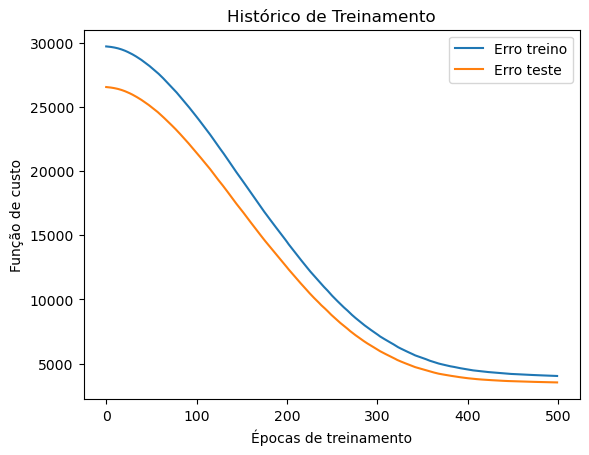

In [30]:
plt.plot(resultado.history["loss"])
plt.plot(resultado.history["val_loss"])
plt.title("Histórico de Treinamento")
plt.ylabel("Função de custo")
plt.xlabel("Épocas de treinamento")
plt.legend(["Erro treino", "Erro teste"])
plt.show()

### O que pode ser feito para melhorar esse resultado?